In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn

import dg1
import plotting

seaborn.set_palette('husl')


INTERVAL_WIDTH = 1.0
TOTAL_TIME = 1.0
COLORS = seaborn.color_palette('husl', 5)

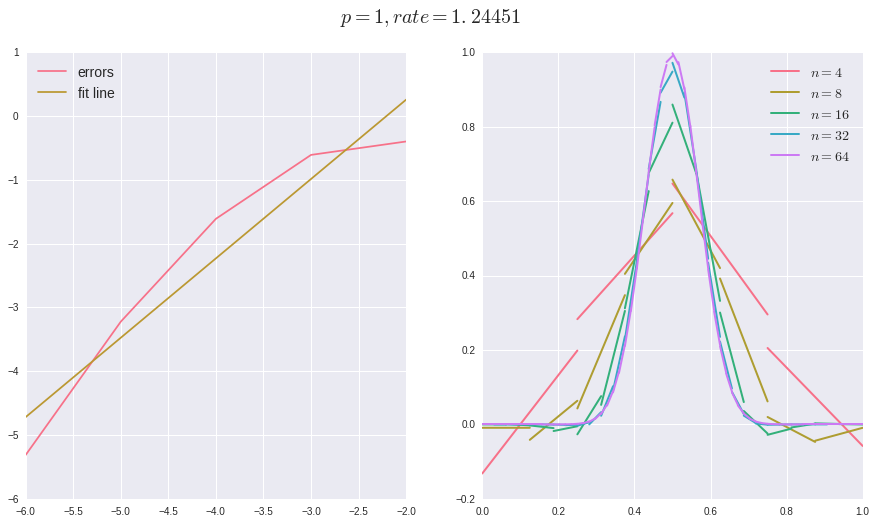

In [2]:
INTERVAL_SIZES = np.array([4, 8, 16, 32, 64])
plotting.plot_convergence(1, INTERVAL_SIZES, COLORS, dg1.DG1Solver,
                          interval_width=INTERVAL_WIDTH,
                          total_time=TOTAL_TIME)

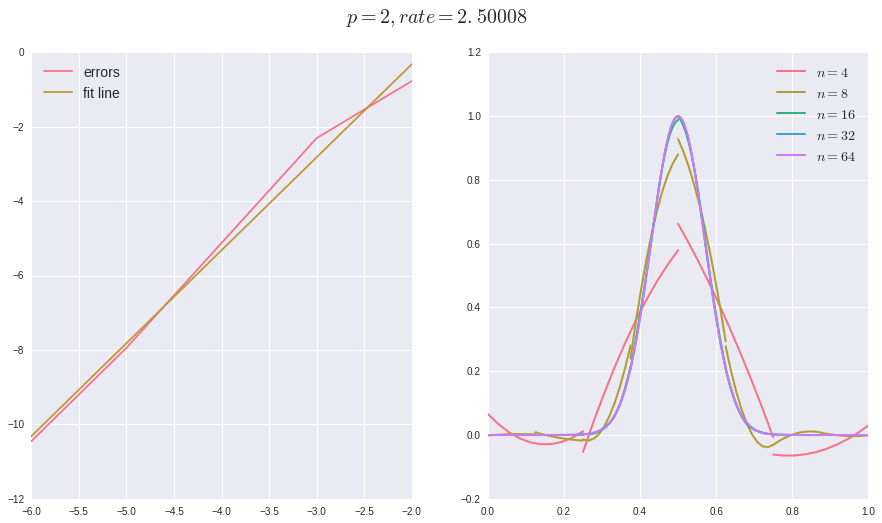

In [3]:
INTERVAL_SIZES = np.array([4, 8, 16, 32, 64])
plotting.plot_convergence(2, INTERVAL_SIZES, COLORS, dg1.DG1Solver,
                          interval_width=INTERVAL_WIDTH,
                          total_time=TOTAL_TIME)

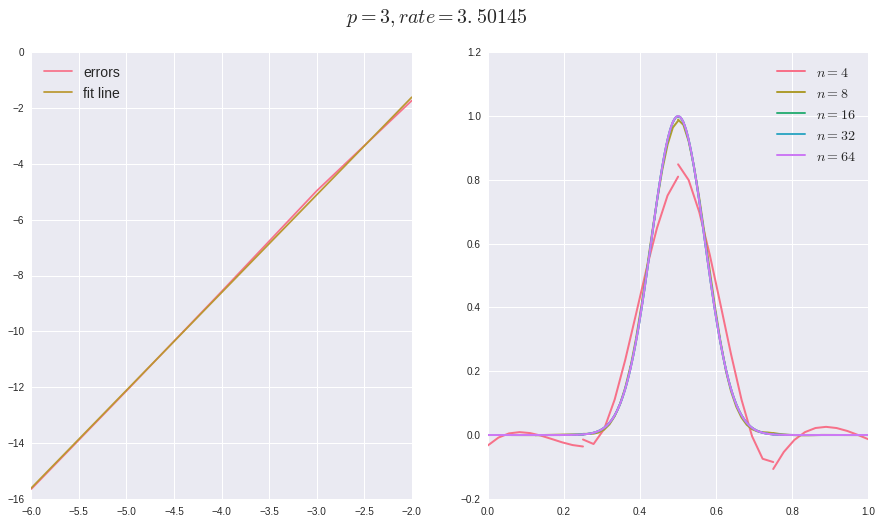

In [4]:
INTERVAL_SIZES = np.array([4, 8, 16, 32, 64])
plotting.plot_convergence(3, INTERVAL_SIZES, COLORS, dg1.DG1Solver,
                          interval_width=INTERVAL_WIDTH,
                          total_time=TOTAL_TIME)

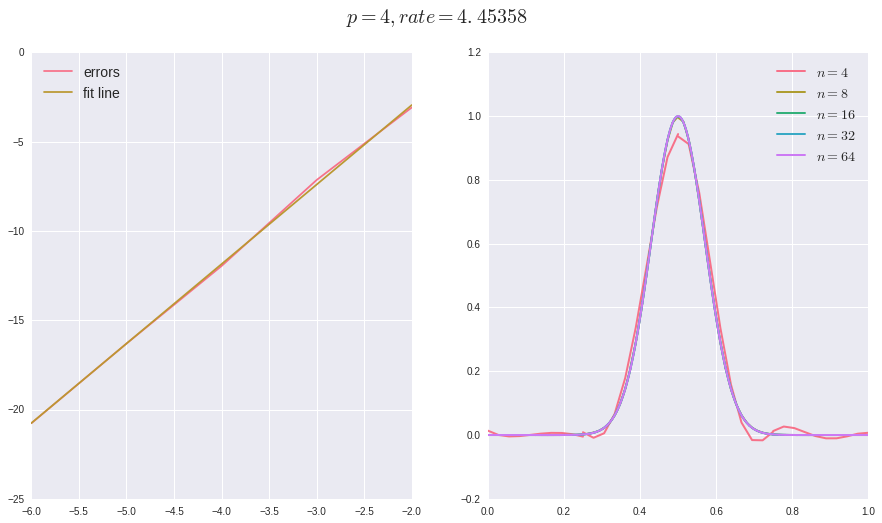

In [5]:
INTERVAL_SIZES = np.array([4, 8, 16, 32, 64])
plotting.plot_convergence(4, INTERVAL_SIZES, COLORS, dg1.DG1Solver,
                          interval_width=INTERVAL_WIDTH,
                          total_time=TOTAL_TIME)

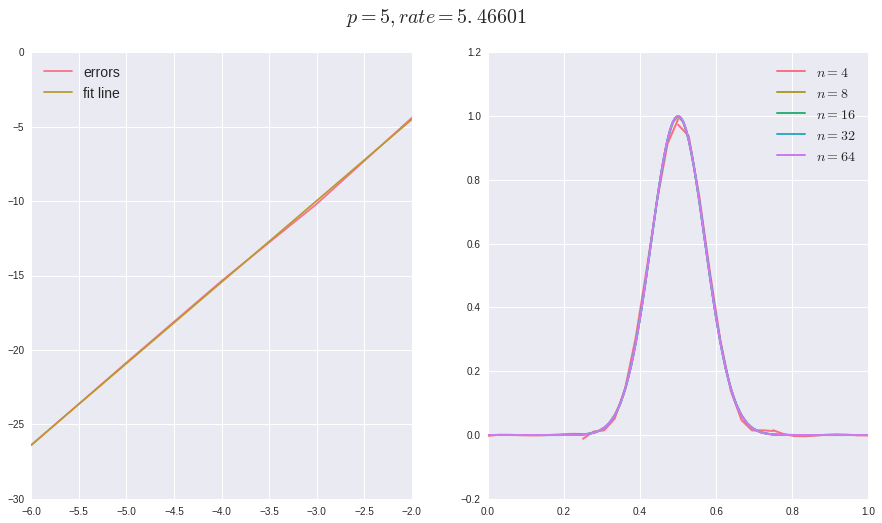

In [6]:
INTERVAL_SIZES = np.array([4, 8, 16, 32, 64])
plotting.plot_convergence(5, INTERVAL_SIZES, COLORS, dg1.DG1Solver,
                          interval_width=INTERVAL_WIDTH,
                          total_time=TOTAL_TIME)

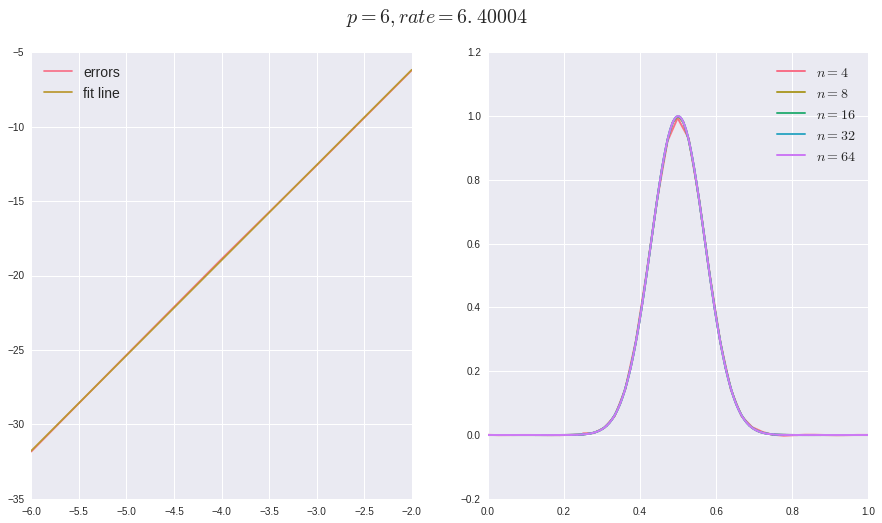

In [7]:
INTERVAL_SIZES = np.array([4, 8, 16, 32, 64])
plotting.plot_convergence(6, INTERVAL_SIZES, COLORS, dg1.DG1Solver,
                          interval_width=INTERVAL_WIDTH,
                          total_time=TOTAL_TIME)

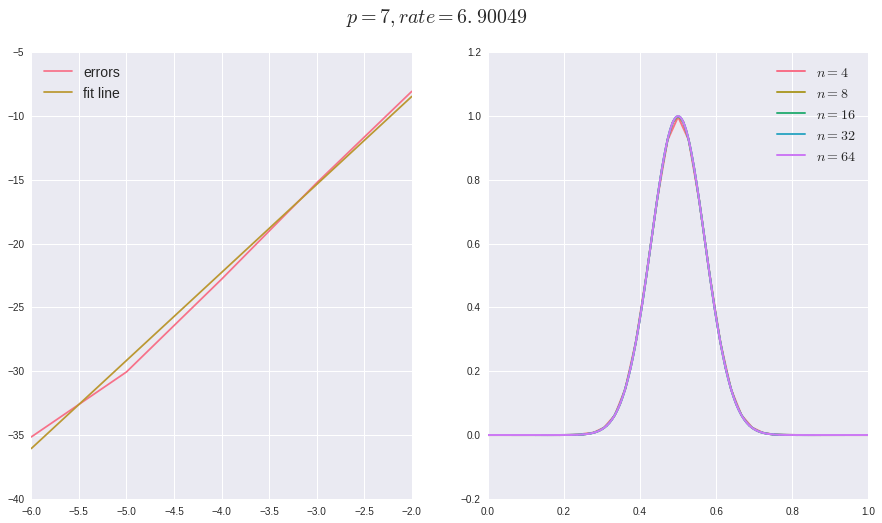

In [8]:
INTERVAL_SIZES = np.array([4, 8, 16, 32, 64])
plotting.plot_convergence(7, INTERVAL_SIZES, COLORS, dg1.DG1Solver,
                          interval_width=INTERVAL_WIDTH,
                          total_time=TOTAL_TIME)

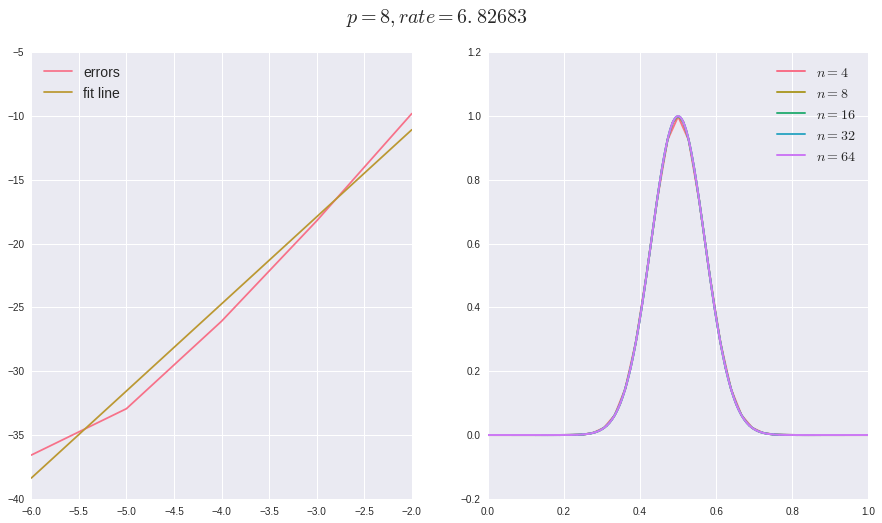

In [9]:
INTERVAL_SIZES = np.array([4, 8, 16, 32, 64])
plotting.plot_convergence(8, INTERVAL_SIZES, COLORS, dg1.DG1Solver,
                          interval_width=INTERVAL_WIDTH,
                          total_time=TOTAL_TIME)